In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensortools as tt
%matplotlib inline

In [2]:
# ground truth model
N, R = 500, 3
factors = [np.random.randn(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 0.1*np.random.randn(*data.shape) # add noise

In [3]:
options={
    'patience': 40,
    'tol': 1e-2,
    'polyak_averages': 100
}

In [4]:
results = tt.fit_ensemble(data, range(1,5), replicates=10, method='randomized', options=options)
est_factors = tt.align_factors(results[R]['factors'][0], factors)[0]

Optimizing rank-1 models.
   10/10 converged, min error = 0.7993, max error = 0.8291, mean error = 0.8128, time to fit = 13.2510s
Optimizing rank-2 models.
   10/10 converged, min error = 0.5626, max error = 0.7206, mean error = 0.5916, time to fit = 17.4462s
Optimizing rank-3 models.
   10/10 converged, min error = 0.0560, max error = 0.6413, mean error = 0.1156, time to fit = 17.9659s
Optimizing rank-4 models.
   10/10 converged, min error = 0.0559, max error = 0.1029, mean error = 0.0638, time to fit = 28.1391s
Total time to fit models: 76.8256s


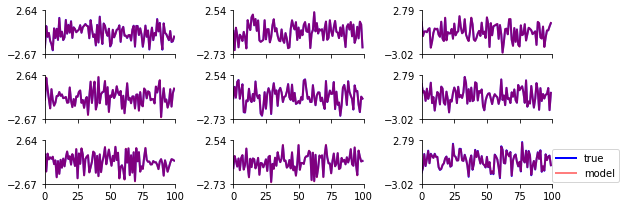

In [5]:
fig, axes, plot_obj = tt.plot_factors([f[:100] for f in factors], line_kw=dict(color='b', lw=2))
tt.plot_factors([f[:100] for f in est_factors], line_kw=dict(color='r', lw=2, alpha=0.5), fig=fig);
axes[-1,-1].legend(('true', 'model'), bbox_to_anchor=[0,0,1.55,0.9])

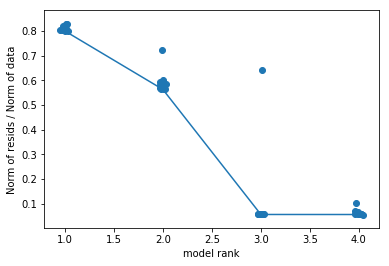

In [6]:
tt.plot_error(results)

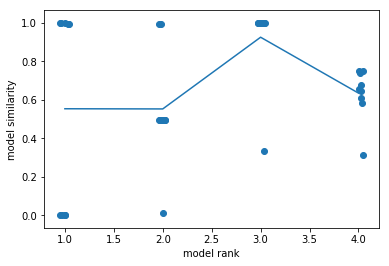

In [7]:
tt.plot_similarity(results)